In [2]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import bitstring
from qiskit_aer import AerSimulator

from qiskit.quantum_info.operators import Operator, Pauli, SparsePauliOp
from qiskit.converters import circuit_to_instruction
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Statevector

#from qiskit import IBMQ, Aer

In [37]:
def rot_surf_code(n: int) -> QuantumCircuit:              #first ancilla = second last qubit = syndrome/parity measurement qubit, secondt ancilla = last qubit = magic state for T Gate
    qr = QuantumRegister(9*n+2, "q")
    cbit = ClassicalRegister(1,"c")
    qc = QuantumCircuit(qr,cbit)
    list = []
    for i in range(0, 9*n):
        list.append("{:c}".format(i))
    list = qr
    for i in range(n):
        qc.h(list[9*i+1])
        qc.h(list[9*i+3])
        qc.h(list[9*i+5])
        qc.h(list[9*i+7])

        qc.cx(list[9*i+1],list[9*i])
        qc.cx(list[9*i+5],list[9*i+4])
        qc.cx(list[9*i+7],list[9*i+8])

        qc.cx(list[9*i+5],list[9*i+2])

        qc.cx(list[9*i+3],list[9*i+4])
        qc.cx(list[9*i+2],list[9*i+1])

        qc.cx(list[9*i+3],list[9*i+6])

        qc.cx(list[9*i+6],list[9*i+7])
    return qc

{'0': 48, '1': 52}


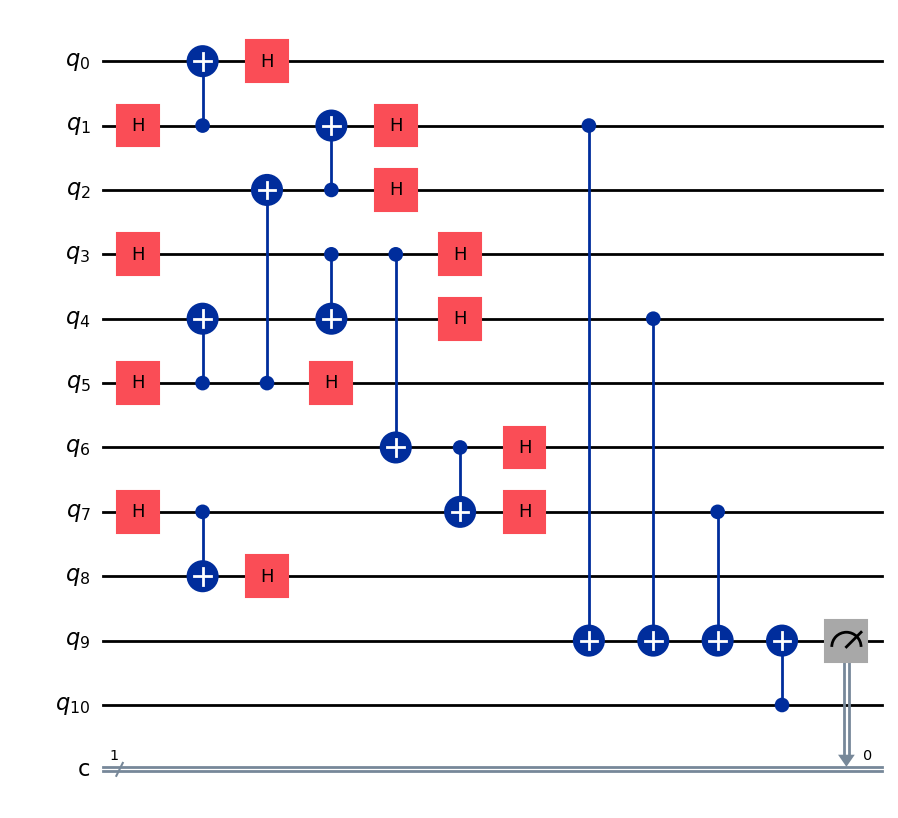

In [70]:
qc = rot_surf_code(1)         #Parity Measurement in Z-Basis --> Funktioniert!

for i in range(9):
    qc.h(i)

#qc.x(1)
#qc.x(4)
#qc.x(7)

qc.cx(1,9)
qc.cx(4,9)
qc.cx(7,9)

#qc.x(10)
qc.cx(10,9)

qc.measure(9,0)

sim = AerSimulator()
job = sim.run(qc, shots=100)
result = job.result()
counts = result.get_counts()
print(counts)

qc.draw("mpl")

{'1': 69}


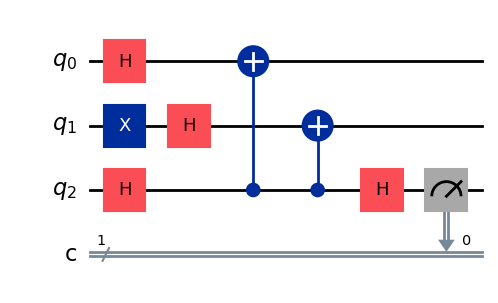

In [46]:
qr = QuantumRegister(3,"q")             #Parity Measurement in X-Basis --> Funktioniert!
cbit = ClassicalRegister(1,"c")

qc = QuantumCircuit(qr,cbit)

qc.h(0)
qc.x(1)
qc.h(1)


qc.h(2)

qc.cx(2,0)
qc.cx(2,1)

qc.h(2)

qc.measure(2,0)

sim = AerSimulator()
job = sim.run(qc, shots=69)
result = job.result()
counts = result.get_counts()
print(counts)
qc.draw("mpl")

{'1': 100}


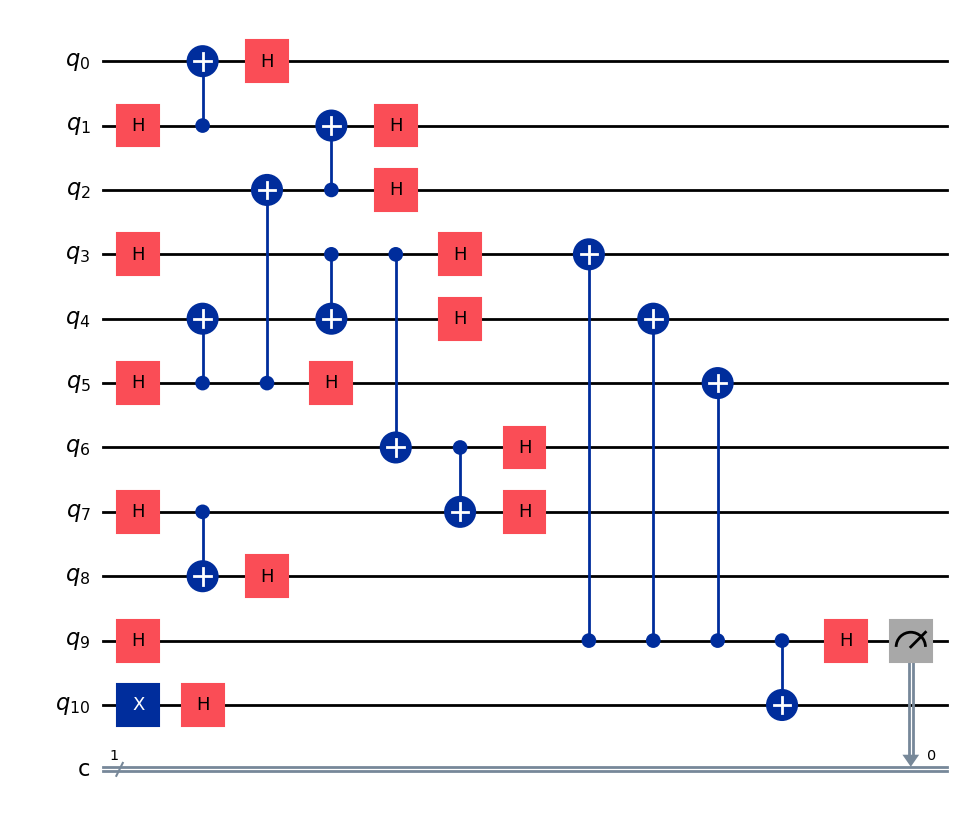

In [51]:
qc = rot_surf_code(1)         #Parity Measurement in X-Basis --> funktioniert!
#qc.z(3)
#qc.z(4)
#qc.z(5)

for i in range(9):
    qc.h(i)
                                #Initliasieren der Qubits für Parity Measruement

qc.x(10)
qc.h(10)

####################################################################

qc.h(9)

qc.cx(9,3)
qc.cx(9,4)
qc.cx(9,5)

qc.cx(9,10)

qc.h(9)

qc.measure(9,0)

sim = AerSimulator()
job = sim.run(qc, shots=100)
result = job.result()
counts = result.get_counts()
print(counts)

qc.draw("mpl")

{'1': 69}


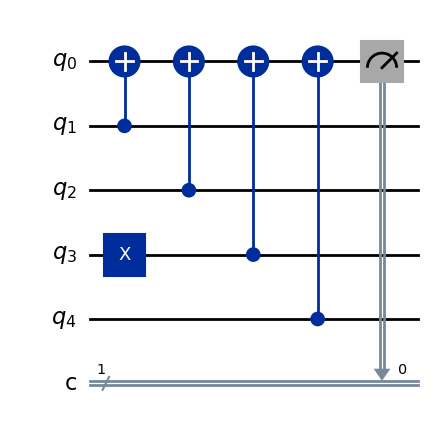

In [102]:
qr = QuantumRegister(5,"q")             #Parity Measurement in X-Basis --> Funktioniert!
cbit = ClassicalRegister(1,"c")

qc = QuantumCircuit(qr,cbit)


qc.x(3)

for i in range(4):
    qc.cx(1+i,0)

qc.measure(0,0)

sim = AerSimulator()
job = sim.run(qc, shots=69)
result = job.result()
counts = result.get_counts()
print(counts)
qc.draw("mpl")

{'0': 30, '1': 39}


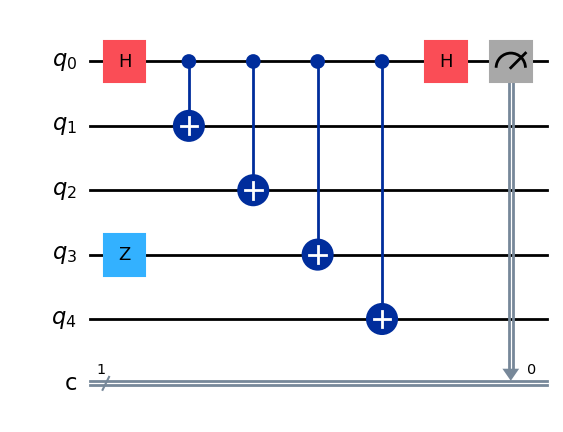

In [105]:
qr = QuantumRegister(5,"q")             #Parity Measurement in X-Basis --> Funktioniert!
cbit = ClassicalRegister(1,"c")

qc = QuantumCircuit(qr,cbit)


qc.z(3)

qc.h(0)
for i in range(4):
    qc.cx(0,1+i)
qc.h(0)
qc.measure(0,0)

sim = AerSimulator()
job = sim.run(qc, shots=69)
result = job.result()
counts = result.get_counts()
print(counts)
qc.draw("mpl")

In [5]:
def X_L(circuit: QuantumCircuit, hadamard: False, n=0):            #n muss bei 0 anfangen, also z.B. man hat 3 Circuits und will X_L auf den ersten anwenden ---> n = 0 !!!
    if hadamard:
        for i in range(9):
            circuit.x(9*n+3)
            circuit.x(9*n+4)
            circuit.x(9*n+5)
    else:
        for i in range(9):
            circuit.x(9*n+1)
            circuit.x(9*n+4)
            circuit.x(9*n+7)
    return circuit

def Z_L(circuit: QuantumCircuit, hadamard: False, n=0):            #n muss bei 0 anfangen, also z.B. man hat 3 Circuits und will Z_L auf den ersten anwenden ---> n = 0 !!!
    if hadamard:
        for i in range(9):
            circuit.z(9*n+1)
            circuit.z(9*n+4)
            circuit.z(9*n+7)
    else:
        for i in range(9):
            circuit.z(9*n+3)
            circuit.z(9*n+4)
            circuit.z(9*n+5)
    return circuit

def Hadmard(circuit: QuantumCircuit, n=0):              #H-Gates auf EINEN Circuit, wieder erster Circuit --> n = 0, zweiter Circuit --> n = 1 , usw.
    for i in range(9):
        circuit.h(9*n+i)
    return circuit

def CNOT(circuit:QuantumCircuit, control: int):               #ich programmiers jetzt mal nur für den Spezialfall von 2 Circuits
    if control == 0:
        for i in range(9):
            circuit.cx(control_qubit=i,target_qubit=9+i)
    elif control == 1: 
        for i in range(9):
            circuit.cx(control_qubit=9+i,target_qubit=i)
    else:
        return print("Noch nicht gecoded!")
    return circuit

def logical_S(circuit: QuantumCircuit, n=0):
    for i in range(9):
        circuit.z(9*n+i)
        circuit.s(9*n+i)
    return circuit

def adjoint_logical_S(circuit: QuantumCircuit, n=0):
    for i in range(9):
        circuit.z(9*n+i)
        circuit.sdg(9*n+i)
    return circuit

#def z_parity(circuit: QuantumCircuit, ) -> int:                 #Z-Parity zwischen einem logischen Qubit und dem magischen Ancilla Qubit

def stabilize(circuit: QuantumCircuit, pos = 0):                     #misst alle stabilizer, speichert den Fehler und korrigiert dementsprechend
    errors = []

    

    return circuit

{'1': 69}


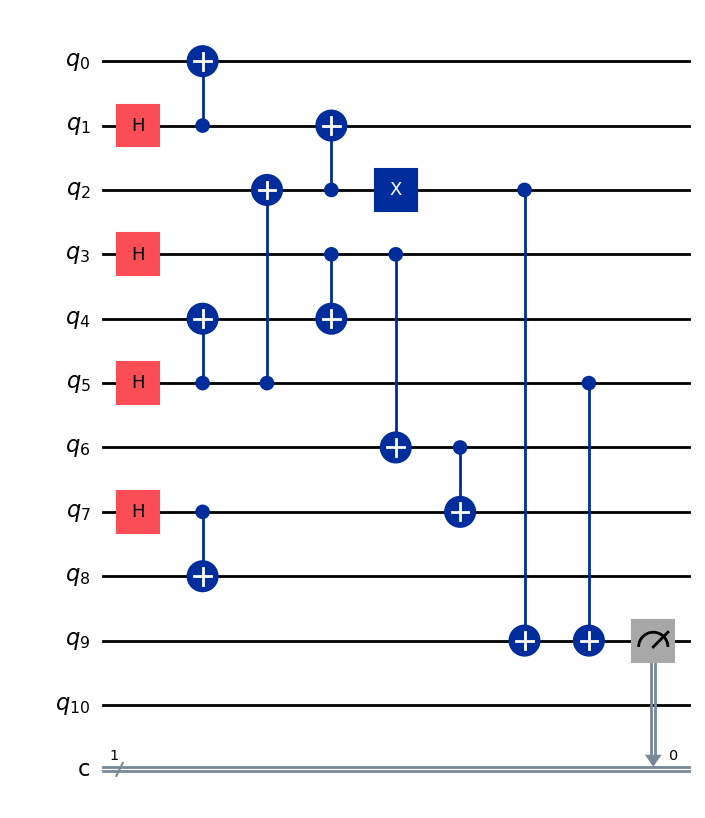

In [109]:
qc = rot_surf_code(1)

qc.x(2)

qc.cx(2,9)
qc.cx(5,9)

qc.measure(9,0)

job = sim.run(qc, shots=69)
result = job.result()
counts = result.get_counts()
print(counts)

qc.draw("mpl")

{'1': 69}


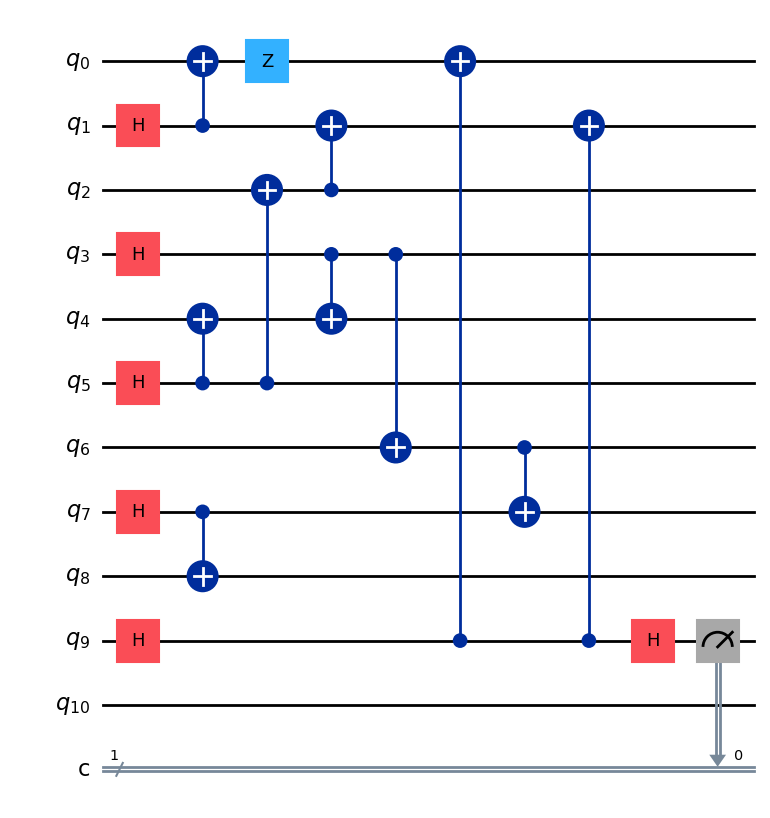

In [110]:
qc = rot_surf_code(1)

qc.z(0)
qc.h(9)
qc.cx(9,0)
qc.cx(9,1)
qc.h(9)
qc.measure(9,0)

job = sim.run(qc, shots=69)
result = job.result()
counts = result.get_counts()
print(counts)

qc.draw("mpl")

In [7]:
qc = rot_surf_code(2)


Erwartungswert von X_L vom ersten log. Qubit :  0.0
Erwartungswert von Z_L vom ersten log. Qubit :  -0.9999999999999998


In [8]:
qc = rot_surf_code(1)

x_l, z_l = logical_operators(qc, True)

qc = Hadmard(qc)


# for j in range(101):
#     for i in range(qc.num_qubits):
#         qc.h(i)

qc = Z_L_rot(qc)

result = estimate_observables(qc, [x_l,z_l])
print("Erwartungswert von X_L : ",result.data.evs[0])
print("Erwartungswert von Z_L : ",result.data.evs[1])

Erwartungswert von X_L :  -0.9999999999999981
Erwartungswert von Z_L :  0.0
